# v0 example
Simple trial with a unique curve and user giving min/max values for x and y

In [96]:
import graph_reader
import cv2
import matplotlib.pyplot as plt
import numpy as np
from importlib import reload
reload(graph_reader)

<module 'graph_reader' from 'c:\\Users\\Jeff\\OneDrive - EPITA\\coding projects\\graph-reader\\graph_reader.py'>

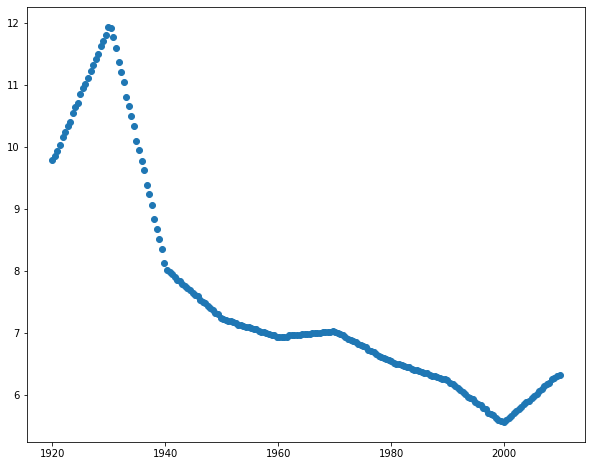

In [108]:
x0, x1 = 1920, 2010
y0, y1 = 5.5, 12
sample_line = r"sample_graphs\line simple.png"
color_img = cv2.imread(sample_line)

x, y, grey_roi, roi = graph_reader.main_v0(color_img, x0, x1, y0, y1, nb_points=200)
plt.figure(figsize=(10, 8))
plt.scatter(x,y)
plt.show()

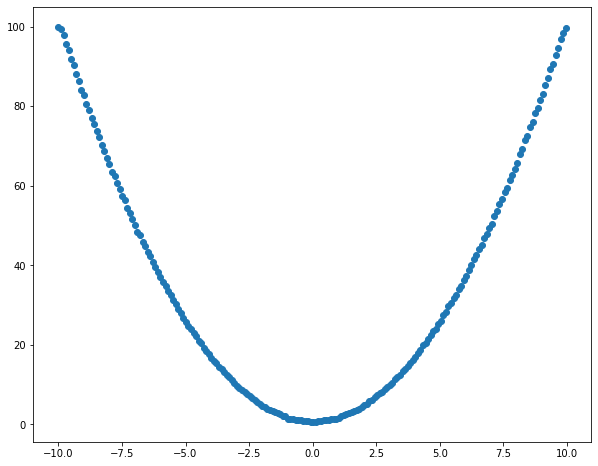

In [10]:
x0, x1 = -10, 10
y0, y1 = 0, 100
sample_line = r"sample_graphs\parabole.png"
color_img = cv2.imread(sample_line)

x, y, grey_roi, roi = graph_reader.main_v0(color_img, x0, x1, y0, y1, nb_points=200)
plt.figure(figsize=(10, 8))
plt.scatter(x,y)
plt.show()

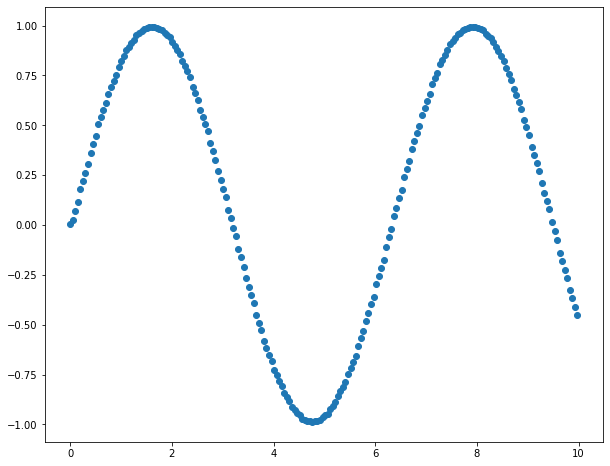

In [11]:

x0, x1 = 0, 10
y0, y1 = -1, 1
sample_line = r"sample_graphs\sin.png"
color_img = cv2.imread(sample_line)

x, y, grey_roi, roi = graph_reader.main_v0(color_img, x0, x1, y0, y1, nb_points=200)
plt.figure(figsize=(10, 8))
plt.scatter(x,y)
plt.show()

# Trials

In [83]:
from sklearn.cluster import KMeans
reload(graph_reader)
sample_line = r"sample_graphs\line simple.png"
sample_line = r"sample_graphs\double_sincos.png"
# sample_line = r"sample_graphs\lineaire_multiple.png"
# sample_line = r"sample_graphs\lineaire_multiple_sans_legende.png"
color_img = cv2.imread(sample_line)
roi = graph_reader.get_curve_roi(color_img)
result = graph_reader.compute_kmeans(roi, nb_clusters=3)

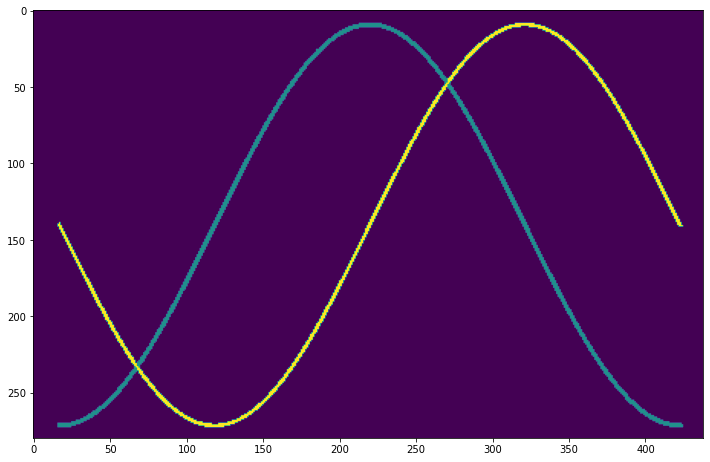

In [71]:
from matplotlib.colors import ListedColormap

plt.figure(figsize=(12, 9))
plt.imshow(result)

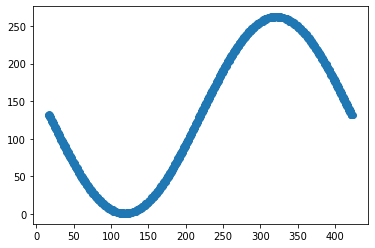

In [63]:
y, x = np.where(result==2)
plt.scatter(x, np.max(y)-y)

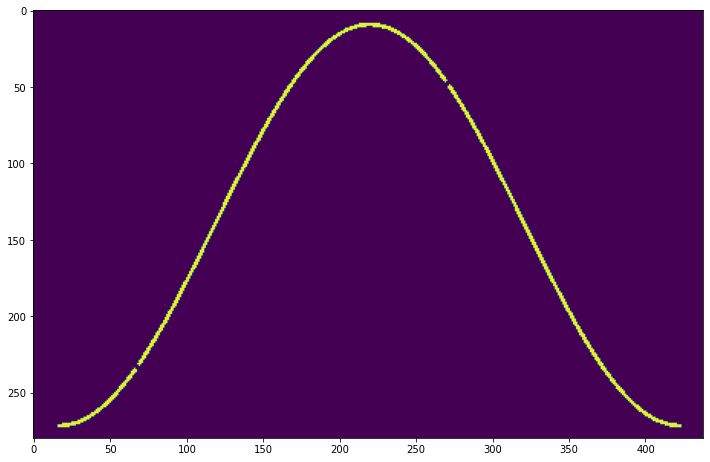

In [68]:
plt.figure(figsize=(12, 9))
plt.imshow(result==1)

In [72]:
def count_curves(gray_roi, x):
    current_pixel = 255
    nb_curves = 0
    for pixel in gray_roi[:, x]:
        if current_pixel > 245 and pixel < 245:
            nb_curves += 1
        current_pixel = pixel
    return nb_curves    

In [110]:
reload(graph_reader)
graph_reader.get_curve_number(roi)
curve_roi, x_axis_roi, y_axis_roi = graph_reader.get_all_rois(color_img)

True

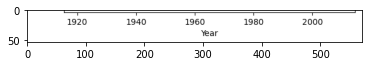

In [111]:
plt.imshow(y_axis_roi)
plt.imshow(x_axis_roi)
cv2.imwrite("x_axis.jpg", x_axis_roi)

In [104]:
minLineLength=3
grey_img = cv2.cvtColor(x_axis_roi, cv2.COLOR_BGR2GRAY)
cv2.imwrite("bandw.jpg", grey_img)

edges = cv2.Canny(grey_img,50,150,apertureSize = 3)
cv2.imwrite('canny.jpg',edges)
lines = cv2.HoughLinesP(image=edges,rho=1,theta=np.pi/180, threshold=100,lines=np.array([]), minLineLength=minLineLength,maxLineGap=80)

a,b,c = lines.shape
for i in range(a):
    cv2.line(x_axis_roi, (lines[i][0][0], lines[i][0][1]), (lines[i][0][2], lines[i][0][3]), (0, 0, 255), 1, cv2.LINE_AA)
    cv2.imwrite('houghlines5.jpg',x_axis_roi)

## Trial to read axis legends with DocTR 
Did not work, I have to check if it works better with PDF or if it is just that the text is too small


In [112]:
from doctr.io import DocumentFile
from doctr.models import ocr_predictor

model = ocr_predictor(pretrained=True)
img_path = r"x_axis.jpg"
# PDF
doc = DocumentFile.from_images(img_path)
# Analyze
result = model(doc)

In [117]:
doc[0].shape

(54, 571, 3)

In [113]:
result

Document(
  (pages): [Page(
    dimensions=(54, 571)
    (blocks): []
  )]
)

## Trial to read axis legends with Tesseract

In [125]:
import pytesseract
from pytesseract.pytesseract import Output

pytesseract.pytesseract.tesseract_cmd = 'C:\\Program Files\\Tesseract-OCR\\tesseract.exe'

In [126]:
boxes = pytesseract.image_to_data(x_axis_roi, output_type=Output.DICT )

In [128]:
boxes.keys()

dict_keys(['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num', 'left', 'top', 'width', 'height', 'conf', 'text'])

In [131]:
boxes["text"]

['',
 '',
 '',
 '',
 ' ',
 '',
 '',
 '',
 '1920',
 '1940',
 '1960',
 '1980',
 '2000',
 '',
 'Year']

# To clean

In [3]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [25]:
sample_line = r"C:\Users\Jeff\OneDrive - EPITA\coding projects\Graph Vision\sample graph\line simple.png"
color_img = cv2.imread(sample_line)

grey_img = cv2.cvtColor(color_img, cv2.COLOR_BGR2GRAY)
ret, thresh_img = cv2.threshold(color_img, 30,255,cv2.THRESH_BINARY)

cv2.imwrite("bandw.jpg", grey_img)
cv2.imwrite("thresh.jpg", thresh_img)
edges = cv2.Canny(grey_img,50,150,apertureSize = 3)
cv2.imwrite('canny.jpg',edges)
# minLineLength=100
# lines = cv2.HoughLinesP(image=edges,rho=1,theta=np.pi/180, threshold=100,lines=np.array([]), minLineLength=minLineLength,maxLineGap=80)

# a,b,c = lines.shape
# for i in range(a):
#     cv2.line(color_img, (lines[i][0][0], lines[i][0][1]), (lines[i][0][2], lines[i][0][3]), (0, 0, 255), 3, cv2.LINE_AA)
#     cv2.imwrite('houghlines5.jpg',color_img)

True

In [27]:
#Find my contours
contours =cv2.findContours(edges,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)[0]


min_area = color_img.shape[0] * color_img.shape[1] / 2
print(min_area)
#Loop through my contours to find rectangles and put them in a list, so i can view them individually later.
cntrRect = []
for i in contours:
        epsilon = 0.05*cv2.arcLength(i,True)
        approx = cv2.approxPolyDP(i,epsilon,True)
        if len(approx) == 4 and cv2.contourArea(i) > min_area:
            print(cv2.contourArea(i))
            cntrRect.append(approx)
            cv2.drawContours(color_img, cntrRect, -1, (0, 255, 0), 2)
            cv2.imwrite('contour.jpg', color_img)



cv2.waitKey(0)
cv2.destroyAllWindows()

131615.5
184864.0


In [35]:
rectangle = np.squeeze(cntrRect[0])
x_min, y_min = np.min(rectangle, axis=0)
x_max, y_max = np.max(rectangle, axis=0)

In [44]:
margin = 3
roi = color_img[y_min+margin: y_max-margin, x_min+margin: x_max-margin]

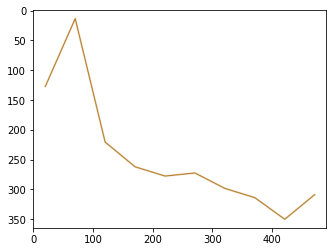

In [45]:
plt.imshow(roi)

In [83]:
bin_roi = cv2.bitwise_not(grey_roi)

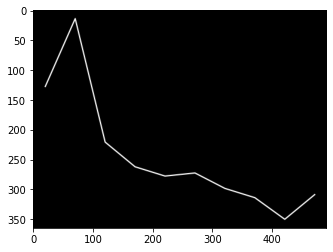

In [84]:
plt.imshow(bin_roi, cmap='gray')

x1: 19 x2: 473 y1: 13 y2: 352


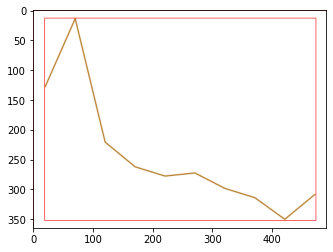

In [86]:
# Generate variables
x1,y1,w,h = cv2.boundingRect(bin_roi)
x2 = x1+w
y2 = y1+h

# Draw bounding rectangle
start = (x1, y1)
end = (x2, y2)
colour = (255, 0, 0)
thickness = 1
rectangle_img = cv2.rectangle(roi, start, end, colour, thickness)
print("x1:", x1, "x2:", x2, "y1:", y1, "y2:", y2)
plt.imshow(rectangle_img, cmap="gray")